In [23]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
banka = pd.read_csv("C:\Hogwarts\machine_learning\Cases\Bankruptcy\Bankruptcy.csv",
                   index_col = 0)

In [4]:
banka.head()

,D,YR,R1,R2,R3,R4,R5,R6,R7,R8,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
NO,,,,,,,,,,,,,,,,,,,,,
1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,10.36,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,3.13,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,2.41,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,5.55,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,2.85,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06


In [5]:
X = banka.drop(['D', 'YR'] , axis =1)
y = banka['D']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    random_state = 2022,
                                                    train_size = 0.7)

In [14]:
rf = RandomForestClassifier(random_state = 2022)

In [15]:
rf.fit(X_train , y_train)

RandomForestClassifier(random_state=2022)

In [17]:
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.85


In [21]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

0.94125


# Using Grid Search

In [26]:
kfold = StratifiedKFold(n_splits=5,
                       shuffle = True,
                       random_state =2022)

In [53]:
params = {"max_features":np.arange(3,15)}

In [29]:
gcv = GridSearchCV(rf,
                  param_grid = params,
                  cv = kfold,
                  verbose = 3,
                  scoring = "roc_auc")

In [30]:
gcv.fit(X,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....................max_features=3;, score=0.863 total time=   0.1s
[CV 2/5] END ....................max_features=3;, score=0.898 total time=   0.1s
[CV 3/5] END ....................max_features=3;, score=0.849 total time=   0.1s
[CV 4/5] END ....................max_features=3;, score=0.976 total time=   0.1s
[CV 5/5] END ....................max_features=3;, score=0.988 total time=   0.1s
[CV 1/5] END ....................max_features=4;, score=0.860 total time=   0.1s
[CV 2/5] END ....................max_features=4;, score=0.909 total time=   0.1s
[CV 3/5] END ....................max_features=4;, score=0.831 total time=   0.1s
[CV 4/5] END ....................max_features=4;, score=0.988 total time=   0.1s
[CV 5/5] END ....................max_features=4;, score=0.988 total time=   0.1s
[CV 1/5] END ....................max_features=5;, score=0.849 total time=   0.1s
[CV 2/5] END ....................max_features=5;

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=RandomForestClassifier(random_state=2022),
             param_grid={'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='roc_auc', verbose=3)

In [31]:
print(gcv.best_params_)

{'max_features': 7}


In [32]:
print(gcv.best_score_)

0.928486897717667


# Feature ImportANce plot

# gcwldvb

In [33]:
import matplotlib.pyplot as plt

In [52]:
best_model = gcv.best_estimator_

In [36]:
imps = best_model.feature_importances_

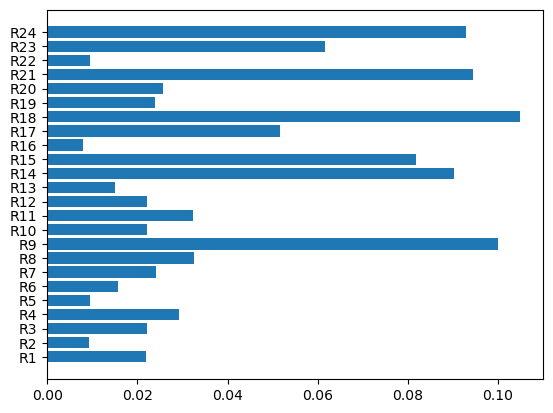

In [40]:
plt.barh(X.columns , imps)
plt.show()

In [41]:
i_sorted = np.argsort(-imps)

In [45]:
n_sorted = X.columns[i_sorted]
imp_sort = imps[i_sorted]

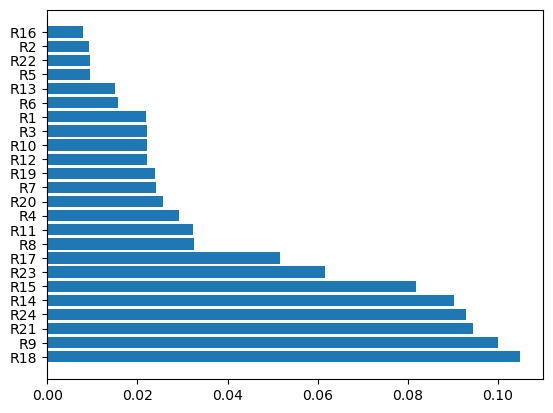

UsageError: Line magic function `%matplotlib.inline` not found.


In [51]:
plt.barh(n_sorted , imp_sort)
plt.show()